### Introducción a SVM

Support Vector Machines (SVM) son un conjunto de métodos supervisados utilizados tanto para clasificación como para regresión. SVM tiene varias ventajas, entre ellas su efectividad en espacios de alta dimensionalidad y su uso eficiente de la memoria.

### 1. Instalación de Bibliotecas Necesarias

Primero, asegúrate de tener instaladas las bibliotecas necesarias. Si no las tienes, puedes instalarlas usando pip:

```sh
pip install numpy matplotlib scikit-learn
```

### 2. Importar Bibliotecas

Comencemos importando las bibliotecas necesarias:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


### 3. Datos Artificiales para Clasificación

Primero, crearemos algunos datos artificiales para clasificación. Usaremos la función `make_blobs` de `scikit-learn`.


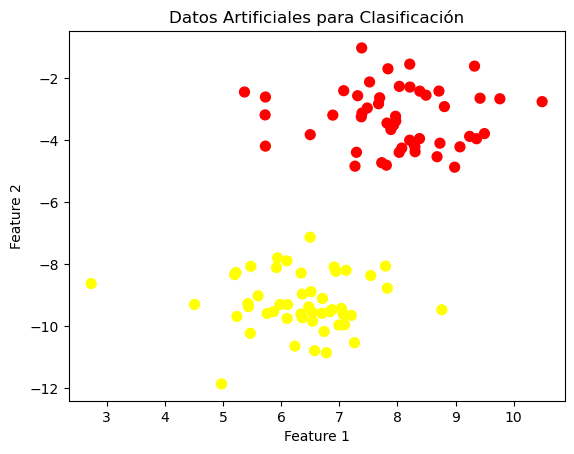

In [2]:
from sklearn.datasets import make_blobs

# Crear datos artificiales
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos Artificiales para Clasificación')
plt.show()


### 4. Clasificación con SVM (Kernel Lineal)

Primero, probaremos el kernel lineal.


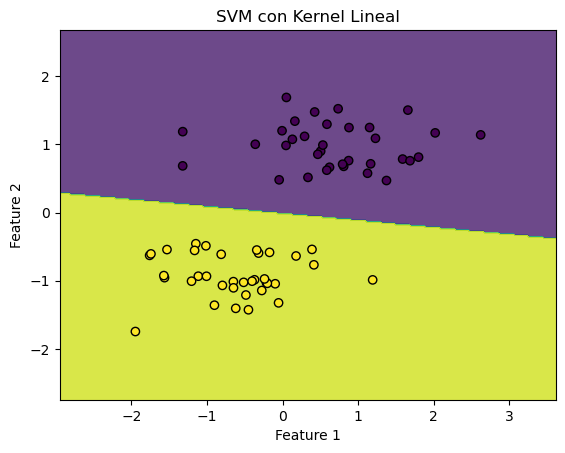

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estándarizar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predicción
y_pred = svm_linear.predict(X_test)

# Visualización del límite de decisión
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM con Kernel Lineal')
    plt.show()

plot_decision_boundary(X_train,y_train, svm_linear)



### 5. Clasificación con SVM (Kernel Polinómico)

Ahora probaremos con un kernel polinómico.

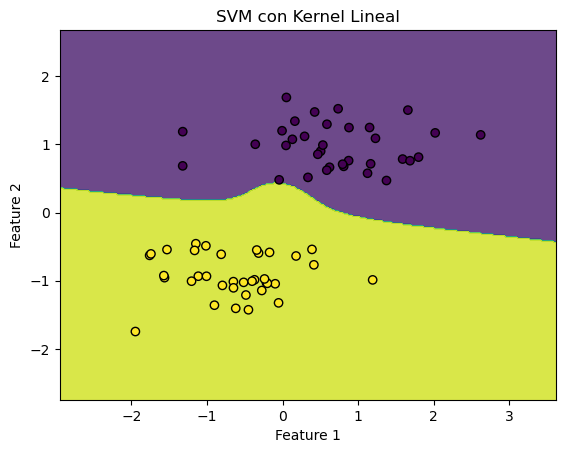

In [4]:
# Crear el modelo SVM con kernel polinómico
svm_poly = SVC(kernel='poly', degree=3)
svm_poly.fit(X_train, y_train)

# Predicción
y_pred_poly = svm_poly.predict(X_test)

# Visualización del límite de decisión
plot_decision_boundary(X_train,y_train, svm_poly)


### 6. Clasificación con SVM (Kernel Gaussiano/RBF)

Por último, usaremos un kernel gaussiano (RBF).


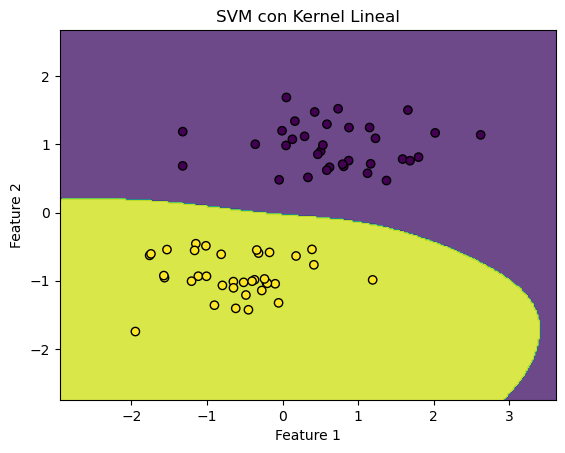

In [5]:
# Crear el modelo SVM con kernel gaussiano
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Predicción
y_pred_rbf = svm_rbf.predict(X_test)

# Visualización del límite de decisión
plot_decision_boundary(X_train, y_train, svm_rbf)


### 7. Datos Artificiales para Regresión

Ahora crearemos algunos datos artificiales para regresión.


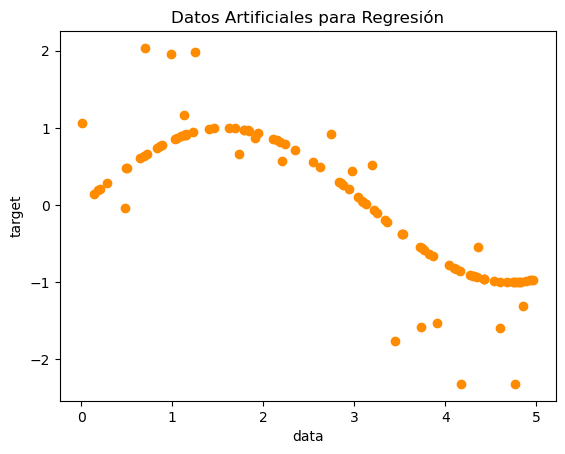

In [6]:
# Crear datos artificiales
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Agregar ruido al modelo
y[::5] += 3 * (0.5 - np.random.rand(20))

# Visualización de los datos
plt.scatter(X, y, color='darkorange', label='data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Datos Artificiales para Regresión')
plt.show()

### 8. Regresión con SVM (Kernel Lineal)

Primero probaremos el kernel lineal para regresión.


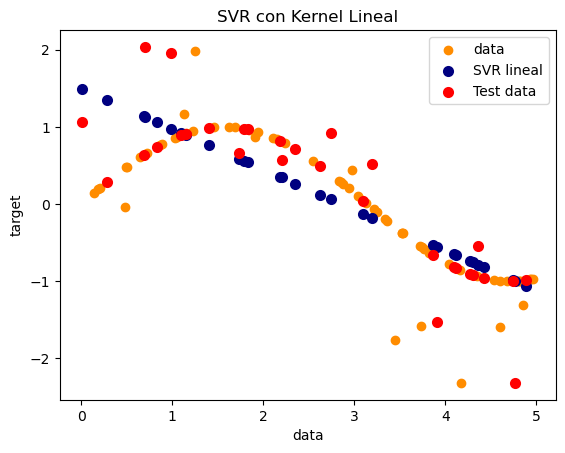

In [7]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo SVR con kernel lineal
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)

# Predicción
y_pred = svr_linear.predict(X_test)

# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred, color='navy', lw=2, label='SVR lineal')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# For each kernel
accuracy = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7269004565077304
Mean Absolute Error: 0.4053367604962918
Mean Squared Error: 0.2868477371154904


### 9. Regresión con SVM (Kernel Polinómico)

Ahora probaremos con un kernel polinómico.

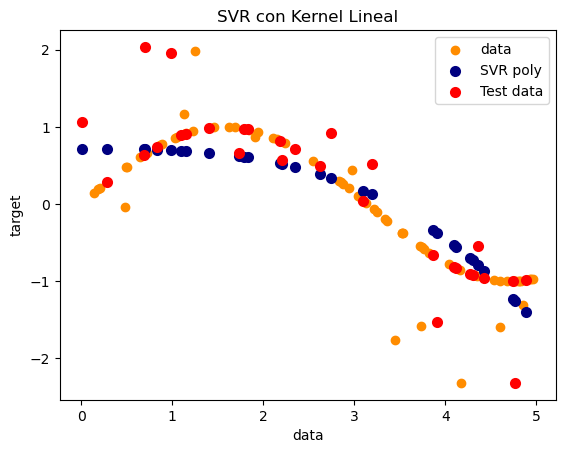

In [9]:
# Crear el modelo SVR con kernel polinómico
svr_poly = SVR(kernel='poly', degree=3)
svr_poly.fit(X_train, y_train)

# Predicción
y_pred_poly = svr_poly.predict(X_test)


# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred_poly, color='navy', lw=2, label='SVR poly')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [10]:
# For each kernel
accuracy = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7501638953884484
Mean Absolute Error: 0.37487587739447015
Mean Squared Error: 0.26241318583383516


### 10. Regresión con SVM (Kernel Gaussiano/RBF)

Por último, usaremos un kernel gaussiano (RBF).


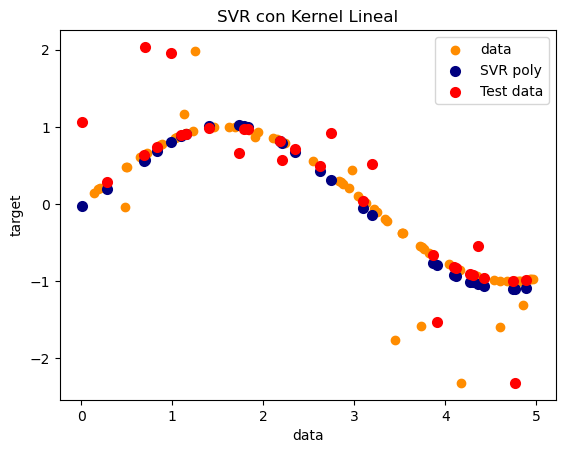

In [11]:
# Crear el modelo SVR con kernel gaussiano
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

# Predicción
y_pred_rbf = svr_rbf.predict(X_test)

# Visualización de ajuste
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.scatter(X_test, y_pred_rbf, color='navy', lw=2, label='SVR poly')
plt.scatter(X_test, y_test, color='red', lw=2, label='Test data')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR con Kernel Lineal')
plt.legend()
plt.show()

In [12]:
# For each kernel
accuracy = r2_score(y_test, y_pred_rbf)
mae = mean_absolute_error(y_test, y_pred_rbf)
mse = mean_squared_error(y_test, y_pred_rbf)

print(f"R² Score: {accuracy}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.7462759159461463
Mean Absolute Error: 0.3101601723614366
Mean Squared Error: 0.26649689132346915


In [13]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

#  With the Kernels already defined
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    
    results.append({
        'Kernel': kernel,
        'R² Score': r2_score(y_test, y_pred),
        'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': mean_squared_error(y_test, y_pred)
    })

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)

   Kernel  R² Score  Mean Absolute Error  Mean Squared Error
0  linear  0.726900             0.405337            0.286848
1    poly  0.750164             0.374876            0.262413
2     rbf  0.746276             0.310160            0.266497
